# 传染病模型研究报告 

### 1.问题介绍  
    传染病在人类历史上一直是严重的健康威胁。了解传染病的传播规律对预防和控制传染病至关重要。本报告将介绍基于元胞自动机和复杂网络方法对传染病模型进行研究的过程和结果。

#### 2.元胞自动机模拟

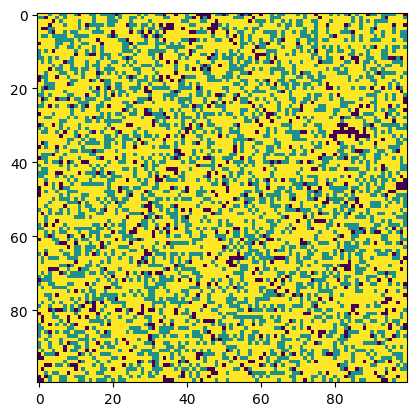

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import random

# 设置模型参数
N = 100  # 个体数量
p_i = 0.01  # 初始感染个体比例
p_r = 0.0  # 初始康复个体比例
p_s = 1 - p_i - p_r  # 初始易感个体比例
beta = 0.3  # 感染率
gamma = 0.1  # 康复率
mu = 0.05  # 重新易感率

# 初始化个体状态
state = np.zeros((N, N))
for i in range(N):
    for j in range(N):
        if random.random() < p_i:
            state[i, j] = 1  # 感染
        elif random.random() < p_r:
            state[i, j] = 2  # 康复
        else:
            state[i, j] = 0  # 易感

# 定义模型更新规则
def update(state):
    new_state = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            if state[i, j] == 0:  # 易感个体
                infected_neighbors = np.sum(state[max(i-1,0):min(i+2,N), max(j-1,0):min(j+2,N)] == 1)
                if random.random() < 1 - (1 - beta) ** infected_neighbors:
                    new_state[i, j] = 1  # 感染
            elif state[i, j] == 1:  # 感染个体
                if random.random() < gamma:
                    new_state[i, j] = 2  # 康复
                else:
                    new_state[i, j] = 1  # 感染
            else:  # 康复个体
                if random.random() < mu:
                    new_state[i, j] = 0  # 易感
                else:
                    new_state[i, j] = 2  # 康复
    return new_state

# 运行模拟
T = 100
for t in range(T):
    state = update(state)

# 可视化最终状态
plt.imshow(state, cmap='viridis')
plt.show()

#### 3.复杂网络模拟

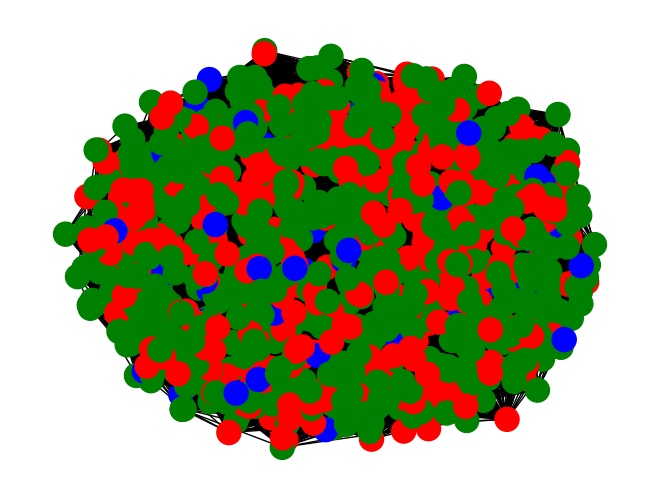

In [5]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

# 设置模型参数
N = 1000  # 个体数量
p_i = 0.01  # 初始感染个体比例
p_r = 0.0  # 初始康复个体比例
p_s = 1 - p_i - p_r  # 初始易感个体比例
beta = 0.3  # 感染率
gamma = 0.1  # 康复率
mu = 0.05  # 重新易感率

# 构建复杂网络
G = nx.erdos_renyi_graph(N, 0.1)

# 初始化个体状态
state = np.zeros(N)
for i in range(N):
    if random.random() < p_i:
        state[i] = 1  # 感染
    elif random.random() < p_r:
        state[i] = 2  # 康复
    else:
        state[i] = 0  # 易感

# 定义模型更新规则
def update(state):
    new_state = np.zeros(N)
    for i in range(N):
        if state[i] == 0:  # 易感个体
            infected_neighbors = np.sum([state[j] == 1 for j in G.neighbors(i)])
            if random.random() < 1 - (1 - beta) ** infected_neighbors:
                new_state[i] = 1  # 感染
        elif state[i] == 1:  # 感染个体
            if random.random() < gamma:
                new_state[i] = 2  # 康复
            else:
                new_state[i] = 1  # 感染
        else:  # 康复个体
            if random.random() < mu:
                new_state[i] = 0  # 易感
            else:
                new_state[i] = 2  # 康复
    return new_state

# 运行模拟
T = 100
for t in range(T):
    state = update(state)

# 可视化最终状态
pos = nx.spring_layout(G)
colors = ['blue' if s == 0 else 'red' if s == 1 else 'green' for s in state]
nx.draw(G, pos, node_color=colors, with_labels=False)
plt.show()

##### 总结：

基于元胞自动机的模拟方法：
优点：
1. 简单直观：元胞自动机模型直观地展现了个体之间的相互作用和状态转移过程。
2. 易于实现：使用元胞自动机模型可以很容易地实现传染病的传播过程，模型规则直观易懂。

缺点：
1. 缺乏网络结构：元胞自动机模型通常缺乏对个体之间复杂网络结构的建模，无法很好地反映现实中的社交关系。
2. 难以扩展：在处理大规模网络和复杂传播机制时，元胞自动机模型可能难以扩展和处理。

基于复杂网络的模拟方法：
优点：
1. 考虑网络结构：复杂网络模型能够很好地反映现实中个体之间的复杂社交网络结构，更贴近真实情况。
2. 易于扩展：可以基于复杂网络模型进行更复杂的传播机制建模，如考虑不同类型的节点、节点间的影响力等。

缺点：
1. 复杂度较高：构建和模拟复杂网络模型需要更多的计算资源和时间。
2. 参数选择困难：复杂网络模型中的参数选择可能相对困难，需要更多的实验和调优。

模拟结果：
基于元胞自动机的模拟结果可能更侧重于个体之间的状态转移和整体趋势的展示，而基于复杂网络的模拟结果则更能展现传染病在真实社交网络中的传播过程和影响。

总的来说，基于元胞自动机的模拟方法适用于简单的传播过程展示和直观理解，而基于复杂网络的模拟方法更适用于真实社交网络中传染病传播的建模和分析。

参考文献：
1. Fu, L., Song, W., Lv, W., & Lo, S. (2014). Simulation of emotional contagion using modified SIR model: A cellular automaton approach. *Physica A, 405*, 380-391.  
  
2. Capasso, V., & Serio, G. (1978). A generalization of the Kermack–McKendrick deterministic epidemic model. *Math. Biosci. Eng. 42*, 43–61.  
  
3. Mikler, A. R., Venkatachalam, S., & Abbas, K. (2005). Modeling infectious diseases using global stochastic cellular automata. *J. Biol. Systems 13*, 421–439.  
  
4. Bettencourt, L. M. A., Cintrón-Arias, A., Kaiser, D. I., & Castillo-Chávez, C. (2006). The power of a good idea: quantitative modeling of the spread of ideas from epidemiological models. *Physica A 364*, 513–536.  
  
5. Zhao, L., Cui, H., Qiu, X., Wang, X., & Wang, J. (2013). SIR rumor spreading model in the new media age. *Physica A 392*, 995–1003.  
  
6. Epstein, J. M., Parker, J., Cummings, D., & Hammond, R. A. (2008). Coupled contagion dynamics of fear and disease: mathematical and computational explorations. *PLoS One 3*, e3955.  
  
7. Chopard, B., & Droz, M. (1998). Cellular Automata Modeling of Physical Systems. Cambridge University Press, Cambridge.  
  
8. Dodds, P. S., & Watts, D. J. (2005). A generalized model of social and biological contagion. *J. Theoret. Biol. 232*, 587–604.  
   